1.) What percentage of the population has access to electricty?
- Access to electricity over time
- Comparison to South-East Asian (SEA) countries 


2.) What constitutes my country's energy mix?
- Energy Mix in the Philippines
- Comparison to South-East Asian (SEA) countries
    - Fossil-Fuel use
    - Renewable Energy Adoption  
    
3.) How are we consuming our energy?
- Electric Power Consumption over time
- Consumption footprint

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import fill_between

# Source
# https://www.kaggle.com/code/ljvmiranda/philippines-energy-use/notebook

In [391]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 25)
pd.set_option('display.max_rows', 1300)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [2]:
df_country = pd.read_csv("country.csv")
df_country_notes = pd.read_csv("CountryNotes.csv")
df_indicators = pd.read_csv("Indicators.csv")

In [3]:
df_indicators.head()
df_indicators.nunique()

CountryName          247
CountryCode          247
IndicatorName       1344
IndicatorCode       1344
Year                  56
Value            3601477
dtype: int64

1. What percentage of the population has access to electricity?

In [419]:
# Looking for what I need
ph_indicators = df_indicators.query("CountryName == 'Philippines'")

ph_indicators.query('IndicatorCode == "EG.ELC.ACCS.RU.ZS"')

hello = ph_indicators.drop_duplicates(subset=['IndicatorName'], keep='last')

hello[hello["IndicatorName"].str.contains("energy")]
#SP.POP.SCIE.RD.P6 / SP.POP.TECH.RD.P6
#hello

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4980395,Philippines,PHL,Methane emissions in energy sector (thousand m...,EN.ATM.METH.EG.KT.CE,2010,6.088800e+03
4980507,Philippines,PHL,Nitrous oxide emissions in energy sector (thou...,EN.ATM.NOXE.EG.KT.CE,2010,7.621000e+02
4980508,Philippines,PHL,Nitrous oxide emissions in industrial and ener...,EN.ATM.NOXE.EI.ZS,2010,6.119872e+00
5158721,Philippines,PHL,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,2011,2.027690e+00
5334295,Philippines,PHL,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,2012,2.279600e+01
5334361,Philippines,PHL,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,2012,1.646986e+01
5334452,Philippines,PHL,"Energy imports, net (% of energy use)",EG.IMP.CONS.ZS,2012,4.257868e+01
5334453,Philippines,PHL,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2012,3.067879e+00
5334511,Philippines,PHL,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,2012,6.073414e+01
5334528,Philippines,PHL,GDP per unit of energy use (constant 2011 PPP ...,EG.GDP.PUSE.KO.PP.KD,2012,1.363341e+01


###### 1.2 Population Growth

In [363]:
ph_pop_growth = ph_indicators.query('IndicatorCode == "SP.POP.GROW" | \
                            IndicatorCode == "SP.RUR.TOTL.ZG" | \
                            IndicatorCode == "SP.URB.GROW"')

sea_indicators = df_indicators.query('CountryName == "Philippines" | \
                                    CountryName == "Brunei" | \
                                    CountryName == "Cambodia" | \
                                    CountryName == "Indonesia" | \
                                    CountryName == "Lao PDR" | \
                                    CountryName == "Malaysia" | \
                                    CountryName == "Myanmar" | \
                                    CountryName == "Thailand" | \
                                    CountryName == "Singapore" | \
                                    CountryName == "Timor-Leste" | \
                                    CountryName == "Vietnam"')       


sea_pop_growth = sea_indicators.query('IndicatorCode == "SP.POP.GROW" | \
                            IndicatorCode == "SP.RUR.TOTL.ZG" | \
                            IndicatorCode == "SP.URB.GROW"')

ph_pop_growth.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
17810,Philippines,PHL,Population growth (annual %),SP.POP.GROW,1960,3.345478
17821,Philippines,PHL,Rural population growth (annual %),SP.RUR.TOTL.ZG,1960,2.911717
17835,Philippines,PHL,Urban population growth (annual %),SP.URB.GROW,1960,4.350614
43653,Philippines,PHL,Population growth (annual %),SP.POP.GROW,1961,3.337265
43664,Philippines,PHL,Rural population growth (annual %),SP.RUR.TOTL.ZG,1961,2.966437
43680,Philippines,PHL,Urban population growth (annual %),SP.URB.GROW,1961,4.185226
71697,Philippines,PHL,Population growth (annual %),SP.POP.GROW,1962,3.318621
71710,Philippines,PHL,Rural population growth (annual %),SP.RUR.TOTL.ZG,1962,2.942076
71726,Philippines,PHL,Urban population growth (annual %),SP.URB.GROW,1962,4.169190
100287,Philippines,PHL,Population growth (annual %),SP.POP.GROW,1963,3.277241


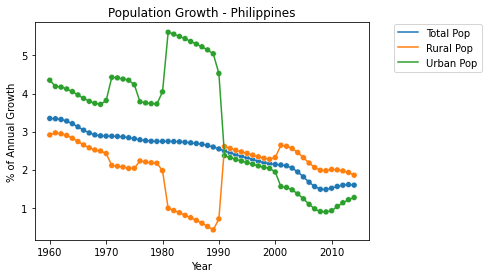

In [369]:
# Plot the responses for different events and regions
ph_pop_growth_pic = sns.lineplot(x="Year", y="Value",
                hue="IndicatorName", legend=True,
                data=ph_pop_growth)

ph_pop_growth_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="IndicatorName", legend=False,
                data=ph_pop_growth)

plt.legend(bbox_to_anchor=(1.35, 0.75), loc='lower right', labels=['Total Pop', 'Rural Pop', 'Urban Pop'])
ph_pop_growth_dot_pic.set(title="Population Growth - Philippines", ylabel="% of Annual Growth")

plt.show(ph_pop_growth_dot_pic)

###### 1.3 Urban & Rural electric accessibility

In [221]:
ph_elec = ph_indicators.query('IndicatorCode == "EG.ELC.ACCS.RU.ZS" | \
                            IndicatorCode == "EG.ELC.ACCS.UR.ZS"')
ph_elec


sea_elec_ru = sea_indicators.query('IndicatorCode == "EG.ELC.ACCS.RU.ZS"')
sea_elec_ur = sea_indicators.query('IndicatorCode == "EG.ELC.ACCS.UR.ZS"')
sea_elec_all = sea_indicators.query('IndicatorCode == "EG.ELC.ACCS.ZS"')

sea_elec_all.nunique()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1968940,Philippines,PHL,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1990,46.400000
1968941,Philippines,PHL,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,1990,85.502696
3287508,Philippines,PHL,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2000,51.900000
3287509,Philippines,PHL,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,2000,92.325089
4979847,Philippines,PHL,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2010,72.800000
4979848,Philippines,PHL,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,2010,94.383621
5334247,Philippines,PHL,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2012,81.500000
5334248,Philippines,PHL,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,2012,93.714188


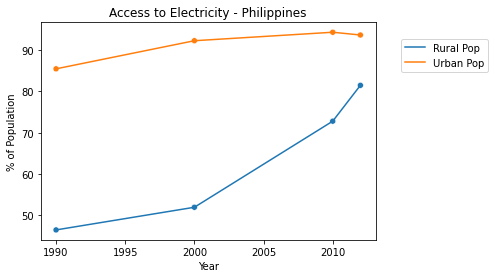

In [223]:
# Plot the responses for different events and regions
ph_elec_pic = sns.lineplot(x="Year", y="Value",
                hue="IndicatorName", legend=False,
                data=ph_elec)

ph_elec_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="IndicatorName", legend=False,
                data=ph_elec)

plt.legend(bbox_to_anchor=(1.35, 0.75), loc='lower right', labels=['Rural Pop', 'Urban Pop'])
ph_elec_dot_pic.set(title="Access to Electricity - Philippines", ylabel="% of Population")

plt.show(ph_elec_dot_pic)

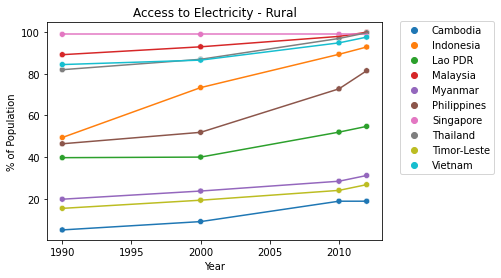

In [121]:
# Plot the responses for different events and regions
sea_elec_ru_line_pic = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", 
                data=sea_elec_ru)

sea_elec_ru_dot_pic = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName",
                data=sea_elec_ru)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_elec_ru_dot_pic.set(title="Access to Electricity - Rural", ylabel="% of Population")

plt.show(sea_elec_ru_dot_pic)

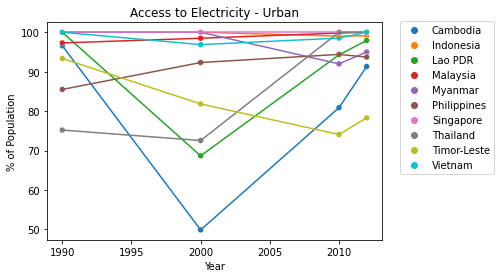

In [135]:
# Plot the responses for different events and regions
sea_elec_ur_line_pic = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", 
                data=sea_elec_ur)

sea_elec_ur_dot_pic = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName",
                data=sea_elec_ur)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_elec_ur_dot_pic.set(title="Access to Electricity - Urban", ylabel="% of Population")

plt.show(sea_elec_ur_dot_pic)

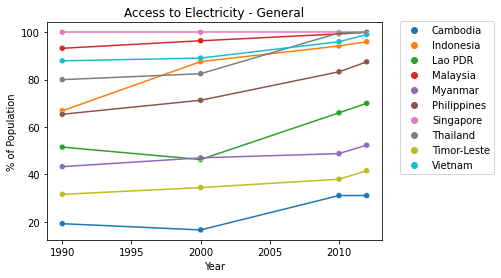

In [124]:
# Plot the responses for different events and regions
sea_elec_all_line_pic = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", 
                data=sea_elec_all)

sea_elec_all_dot_pic = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName",
                data=sea_elec_all)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_elec_all_dot_pic.set(title="Access to Electricity - General", ylabel="% of Population")

plt.show(sea_elec_all_dot_pic)

2. What constitutes my country's energy mix?

In [190]:
ph_energy = ph_indicators.query('IndicatorCode == "EG.ELC.FOSL.ZS" | \
                            IndicatorCode == "EG.ELC.HYRO.ZS" | \
                            IndicatorCode == "EG.ELC.NUCL.ZS" | \
                            IndicatorCode == "EG.ELC.RNWX.ZS"')
ph_energy

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
413204,Philippines,PHL,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1971,0.000000
413206,Philippines,PHL,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,1971,0.000000
413208,Philippines,PHL,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1971,100.000000
413209,Philippines,PHL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1971,0.000000
482542,Philippines,PHL,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1972,0.000000
...,...,...,...,...,...,...
5158798,Philippines,PHL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2011,14.636579
5334428,Philippines,PHL,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2012,14.059050
5334430,Philippines,PHL,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,2012,0.000000
5334432,Philippines,PHL,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,2012,71.530835


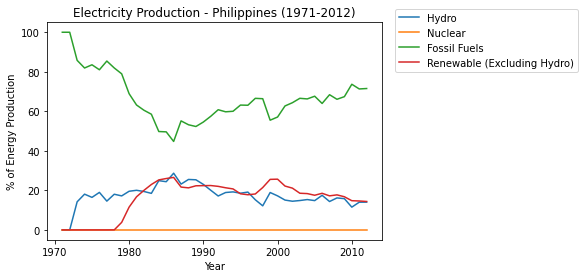

In [390]:
# Plot the responses for different events and regions
ph_energy_pic = sns.lineplot(x="Year", y="Value",
                hue="IndicatorName",
                data=ph_energy)

#ph_energy_dot_pic = sns.scatterplot(x="Year", y="Value",
#                hue="IndicatorName",
#                data=ph_energy)

plt.legend(bbox_to_anchor=(1.60, 0.75), loc='lower right', labels=['Hydro', 'Nuclear', 'Fossil Fuels', 'Renewable (Excluding Hydro)'])
ph_energy_pic.set(title="Electricity Production - Philippines (1971-2012)", ylabel="% of Energy Production")


plt.show(ph_energy_pic)

1.1 Southeast Asia - energy production

In [242]:
sea_indicators2 = df_indicators.query('CountryName == "Philippines" | \
                                    CountryName == "Cambodia" | \
                                    CountryName == "Myanmar" | \
                                    CountryName == "Singapore" | \
                                    CountryName == "Vietnam"')

sea_energy_hydro2 = sea_indicators2.query('IndicatorCode == "EG.ELC.HYRO.ZS"')
sea_energy_nuclear2 = sea_indicators2.query('IndicatorCode == "EG.ELC.NUCL.ZS"')
sea_energy_fossil2 = sea_indicators2.query('IndicatorCode == "EG.ELC.FOSL.ZS"')
sea_energy_renew2 = sea_indicators2.query('IndicatorCode == "EG.ELC.RNWX.ZS"')

In [243]:
sea_energy_hydro = sea_indicators.query('IndicatorCode == "EG.ELC.HYRO.ZS"')
sea_energy_nuclear = sea_indicators.query('IndicatorCode == "EG.ELC.NUCL.ZS"')
sea_energy_fossil = sea_indicators.query('IndicatorCode == "EG.ELC.FOSL.ZS"')
sea_energy_renew = sea_indicators.query('IndicatorCode == "EG.ELC.RNWX.ZS"')

sea_energy_hydro.nunique()

CountryName        8
CountryCode        8
IndicatorName      1
IndicatorCode      1
Year              42
Value            262
dtype: int64

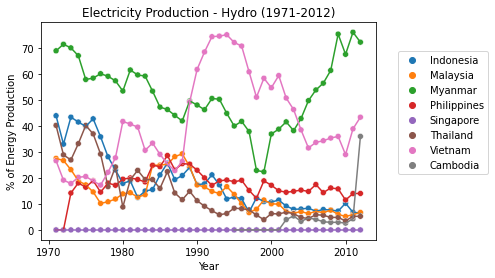

In [336]:
# Plot the responses for different events and regions
sea_energy_hydro_line_pic = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", 
                data=sea_energy_hydro)

sea_energy_hydro_dot_pic = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName",
                data=sea_energy_hydro)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_energy_hydro_dot_pic.set(title="Electricity Production - Hydro (1971-2012)", ylabel="% of Energy Production")

plt.show(sea_energy_hydro_dot_pic)

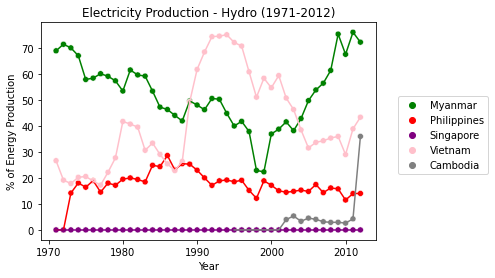

In [335]:
# Plot the responses for different events and regions
sea_energy_hydro_line_pic2 = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", palette=["green", "red", "purple", "pink", "grey"],
                data=sea_energy_hydro2)

sea_energy_hydro_dot_pic2 = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName", palette=["green", "red", "purple", "pink", "grey"],
                data=sea_energy_hydro2)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_energy_hydro_dot_pic2.set(title="Electricity Production - Hydro (1971-2012)", ylabel="% of Energy Production")

plt.show(sea_energy_hydro_dot_pic2)

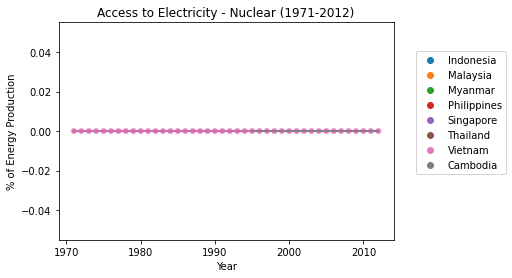

In [227]:
# Plot the responses for different events and regions
sea_energy_nuc_line_pic = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", 
                data=sea_energy_nuclear)

sea_energy_nuc_dot_pic = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName",
                data=sea_energy_nuclear)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_energy_nuc_dot_pic.set(title="Access to Electricity - Nuclear (1971-2012)", ylabel="% of Energy Production")

plt.show(sea_energy_nuc_dot_pic)

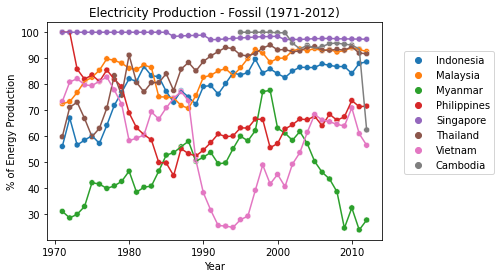

In [337]:
# Plot the responses for different events and regions
sea_energy_fos_line_pic = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", 
                data=sea_energy_fossil)

sea_energy_fos_dot_pic = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName",
                data=sea_energy_fossil)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_energy_fos_dot_pic.set(title="Electricity Production - Fossil (1971-2012)", ylabel="% of Energy Production")

plt.show(sea_energy_fos_dot_pic)

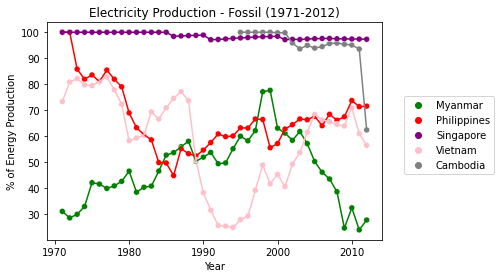

In [338]:
# Plot the responses for different events and regions
sea_energy_fos_line_pic2 = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", palette=["green", "red", "purple", "pink", "grey"],
                data=sea_energy_fossil2)

sea_energy_fos_dot_pic2 = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName", palette=["green", "red", "purple", "pink", "grey"],
                data=sea_energy_fossil2)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_energy_fos_dot_pic2.set(title="Electricity Production - Fossil (1971-2012)", ylabel="% of Energy Production")

plt.show(sea_energy_fos_dot_pic2)

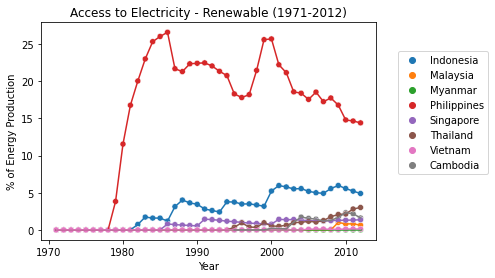

In [229]:
# Plot the responses for different events and regions
sea_energy_ren_line_pic = sns.lineplot(x="Year", y="Value",
                legend=False, hue="CountryName", 
                data=sea_energy_renew)

sea_energy_ren_dot_pic = sns.scatterplot(x="Year", y="Value",
                legend=True, hue="CountryName",
                data=sea_energy_renew)

plt.legend(bbox_to_anchor=(1.35, 0.28), loc='lower right')
sea_energy_ren_dot_pic.set(title="Access to Electricity - Renewable (1971-2012)", ylabel="% of Energy Production")

plt.show(sea_energy_ren_dot_pic)

3. How are we consuming our energy?

In [162]:
ph_consume = ph_indicators.query('IndicatorCode == "EG.USE.ELEC.KH.PC"')
ph_consume

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
413201,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1971,235.759872
482539,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1972,260.458690
552078,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1973,321.887296
621941,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1974,309.390104
693836,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1975,314.468082
...,...,...,...,...,...,...
4616180,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2008,588.512712
4794870,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2009,593.855117
4980039,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2010,644.268136
5158790,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2011,650.742832


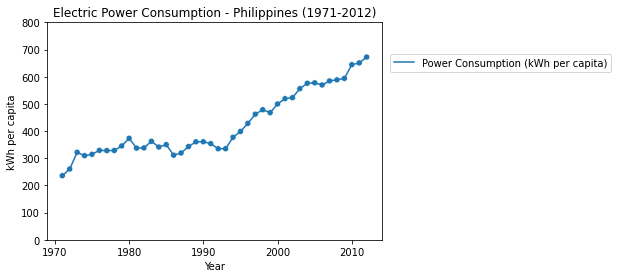

In [266]:
# Plot the responses for different events and regions
ph_consume_pic = sns.lineplot(x="Year", y="Value",
                hue="IndicatorName",
                data=ph_consume)


ph_consume_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="IndicatorName", legend=False,
                data=ph_consume)

plt.legend(bbox_to_anchor=(1.70, 0.75), labels=['Power Consumption (kWh per capita)'], loc='lower right')
ph_consume_dot_pic.set(title="Electric Power Consumption - Philippines (1971-2012)", ylabel="kWh per capita", ylim=(0,800))


plt.show(ph_consume_dot_pic)

Southeast Asia - Power Consumption

In [188]:
sea_consume = sea_indicators.query('IndicatorCode == "EG.USE.ELEC.KH.PC"')
sea_consume.nunique()

CountryName        8
CountryCode        8
IndicatorName      1
IndicatorCode      1
Year              42
Value            312
dtype: int64

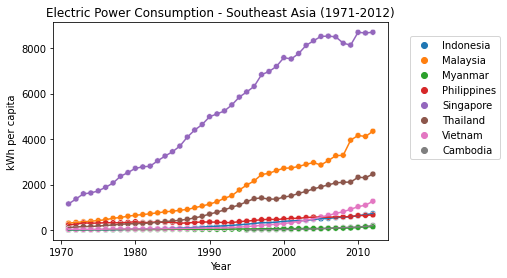

In [185]:
# Plot the responses for different events and regions
sea_consume_pic = sns.lineplot(x="Year", y="Value",
                hue="CountryName", legend=False,
                data=sea_consume)

sea_consume_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="CountryName", legend=True,
                data=sea_consume)

plt.legend(bbox_to_anchor=(1.35, 0.35), loc='lower right')
sea_consume_dot_pic.set(title="Electric Power Consumption - Southeast Asia (1971-2012)", ylabel="kWh per capita")

plt.show(sea_consume_dot_pic)

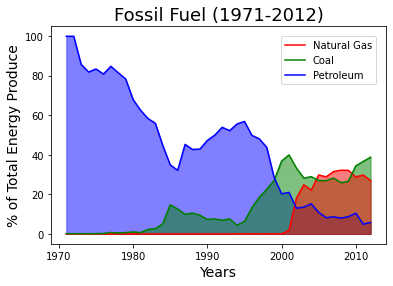

In [401]:
df_elec_ngas = ph_indicators[(ph_indicators.CountryName=='Philippines')&(ph_indicators.IndicatorCode=='EG.ELC.NGAS.ZS')]
df_elec_coal = ph_indicators[(ph_indicators.CountryName=='Philippines')&(ph_indicators.IndicatorCode=='EG.ELC.COAL.ZS')]
df_elec_petr = ph_indicators[(ph_indicators.CountryName=='Philippines')&(ph_indicators.IndicatorCode=='EG.ELC.PETR.ZS')]

fig = plt.figure()

plt.plot(df_elec_ngas.Year,df_elec_ngas.Value,label='Natural Gas',color="red")
plt.plot(df_elec_coal.Year,df_elec_coal.Value,label='Coal',color="green")
plt.plot(df_elec_petr.Year,df_elec_petr.Value,label='Petroleum',color="blue")

fill_between(df_elec_petr.Year,df_elec_petr.Value,0,alpha=0.5,color="blue")
fill_between(df_elec_coal.Year,df_elec_coal.Value,0,alpha=0.5,color="green")
fill_between(df_elec_ngas.Year,df_elec_ngas.Value,0,alpha=0.5,color="red")



plt.legend(loc=1, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Total Energy Produce',  fontsize=14)
plt.title('Fossil Fuel (1971-2012)', fontsize=18)

plt.show()
fig.savefig('fossil_fuel_mix.png',format='png', dpi=300)

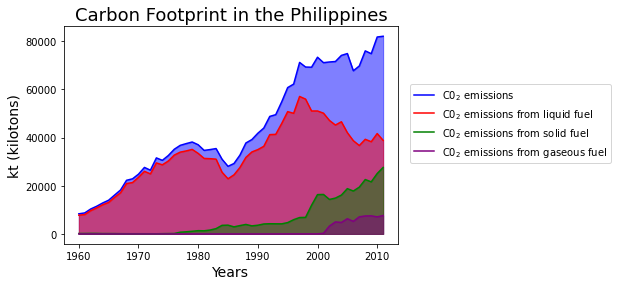

In [410]:
df_elec_emi = ph_indicators[(ph_indicators.CountryName=='Philippines')&(ph_indicators.IndicatorCode=='EN.ATM.CO2E.KT')]
df_elec_gf = ph_indicators[(ph_indicators.CountryName=='Philippines')&(ph_indicators.IndicatorCode=='EN.ATM.CO2E.GF.KT')]
df_elec_lf = ph_indicators[(ph_indicators.CountryName=='Philippines')&(ph_indicators.IndicatorCode=='EN.ATM.CO2E.LF.KT')]
df_elec_sf = ph_indicators[(ph_indicators.CountryName=='Philippines')&(ph_indicators.IndicatorCode=='EN.ATM.CO2E.SF.KT')]

fig = plt.figure()

plt.plot(df_elec_emi.Year,df_elec_emi.Value,label='C0$_2$ emissions',color="blue")
plt.plot(df_elec_lf.Year,df_elec_lf.Value,label='C0$_2$ emissions from liquid fuel',color="red")
plt.plot(df_elec_sf.Year,df_elec_sf.Value,label='C0$_2$ emissions from solid fuel',color="green")
plt.plot(df_elec_gf.Year,df_elec_gf.Value,label='C0$_2$ emissions from gaseous fuel',color="purple")

fill_between(df_elec_emi.Year,df_elec_emi.Value,0,alpha=0.5,color="blue")
fill_between(df_elec_lf.Year,df_elec_lf.Value,0,alpha=0.5,color="red")
fill_between(df_elec_sf.Year,df_elec_sf.Value,0,alpha=0.5,color="green")
fill_between(df_elec_gf.Year,df_elec_gf.Value,0,alpha=0.5,color="purple")

plt.legend(bbox_to_anchor=(1.65, 0.35), loc='lower right')
plt.xlabel('Years',  fontsize=14)
plt.ylabel('kt (kilotons)',  fontsize=14)
plt.title('Carbon Footprint in the Philippines', fontsize=18)



fig.savefig('co2_emissions.png',format='png')

4.) Tech Industry

###### 4.1 High tech exports

In [341]:
ph_tech = ph_indicators.query('IndicatorCode == "TX.VAL.TECH.MF.ZS"')
ph_tech

sea_tech = sea_indicators.query('IndicatorCode == "TX.VAL.TECH.MF.ZS"')
sea_tech

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1753119,Malaysia,MYS,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,1988,40.584342
1833981,Indonesia,IDN,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,1989,1.454872
1844527,Malaysia,MYS,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,1989,38.375924
1863885,Singapore,SGP,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,1989,36.444659
1871516,Thailand,THA,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,1989,18.950299
...,...,...,...,...,...,...
5495372,Philippines,PHL,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,2013,47.107665
5505719,Singapore,SGP,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,2013,46.994367
5518818,Thailand,THA,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,2013,20.093326
5519575,Timor-Leste,TMP,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,2013,9.781642


No handles with labels found to put in legend.


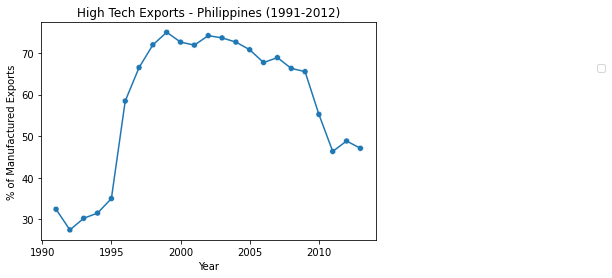

In [342]:
# Plot the responses for different events and regions
ph_tech_pic = sns.lineplot(x="Year", y="Value",
                hue="IndicatorName", legend=False,
                data=ph_tech)

ph_tech_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="IndicatorName", legend=False,
                data=ph_tech)

plt.legend(bbox_to_anchor=(1.70, 0.75), loc='lower right')
ph_tech_dot_pic.set(title="High Tech Exports - Philippines (1991-2012)", ylabel="% of Manufactured Exports")

plt.show(ph_tech_dot_pic)

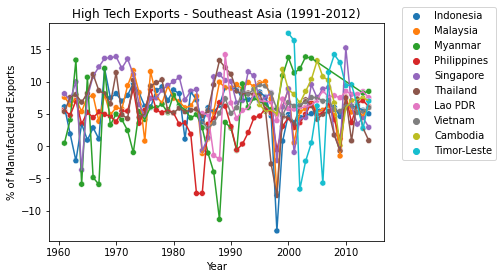

In [313]:
# Plot the responses for different events and regions
sea_tech_pic = sns.lineplot(x="Year", y="Value",
                hue="CountryName", legend=False,
                data=sea_tech)

sea_tech_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="CountryName", legend=True,
                data=sea_tech)

plt.legend(bbox_to_anchor=(1.35, 0.35), loc='lower right')
sea_tech_dot_pic.set(title="High Tech Exports - Southeast Asia (1991-2012)", ylabel="% of Manufactured Exports")

plt.show(sea_tech_dot_pic)

###### 4.2 ATM

In [339]:
ph_atm = ph_indicators.query('IndicatorCode == "FB.ATM.TOTL.P5"')


sea_atm = sea_indicators.query('IndicatorCode == "FB.ATM.TOTL.P5"')
ph_atm

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3903226,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2004,10.369816
4078249,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2005,11.502896
4256214,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2006,12.425245
4436110,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2007,12.656671
4616039,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2008,13.390253
4794735,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2009,14.306268
4979911,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2010,15.494294
5158632,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2011,17.227501
5334310,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2012,19.309536
5495087,Philippines,PHL,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,2013,22.422477


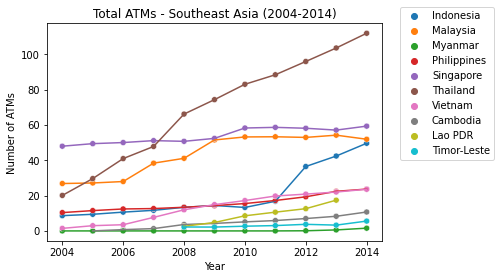

In [349]:
# Plot the responses for different events and regions
sea_atm_pic = sns.lineplot(x="Year", y="Value",
                hue="CountryName", legend=False,
                data=sea_atm)

sea_atm_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="CountryName", legend=True,
                data=sea_atm)

plt.legend(bbox_to_anchor=(1.35, 0.35), loc='lower right')
sea_atm_dot_pic.set(title="Total ATMs - Southeast Asia (2004-2014)", ylabel="Number of ATMs")

plt.show(sea_atm_dot_pic)

###### 4.3 Trademarks

In [344]:
ph_trade = ph_indicators.query('IndicatorCode == "IP.TMK.RESD"')


sea_trade = sea_indicators.query('IndicatorCode == "IP.TMK.RESD"')


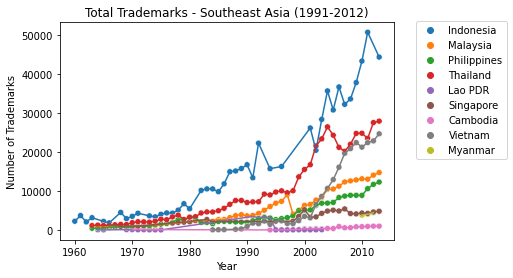

In [350]:
# Plot the responses for different events and regions
sea_trade_pic = sns.lineplot(x="Year", y="Value",
                hue="CountryName", legend=False,
                data=sea_trade)

sea_trade_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="CountryName", legend=True,
                data=sea_trade)

plt.legend(bbox_to_anchor=(1.35, 0.35), loc='lower right')
sea_trade_dot_pic.set(title="Total Trademarks - Southeast Asia (1991-2012)", ylabel="Number of Trademarks")

plt.show(sea_trade_dot_pic)

###### 4.4 Research

In [396]:
#SP.POP.SCIE.RD.P6 / SP.POP.TECH.RD.P6 / GB.XPD.RSDV.GD.ZS
ph_research = ph_indicators.query('IndicatorCode == "SP.POP.SCIE.RD.P6" | IndicatorCode == "SP.POP.TECH.RD.P6" | IndicatorCode == "GB.XPD.RSDV.GD.ZS"')
ph_research

sea_research = sea_indicators.query('IndicatorCode == "GB.XPD.RSDV.GD.ZS"')
ph_research.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3593099,Philippines,PHL,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2002,0.13744
3747206,Philippines,PHL,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2003,0.12994
3747207,Philippines,PHL,Researchers in R&D (per million people),SP.POP.SCIE.RD.P6,2003,70.62646
3747278,Philippines,PHL,Technicians in R&D (per million people),SP.POP.TECH.RD.P6,2003,11.30505
4079079,Philippines,PHL,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,2005,0.11143


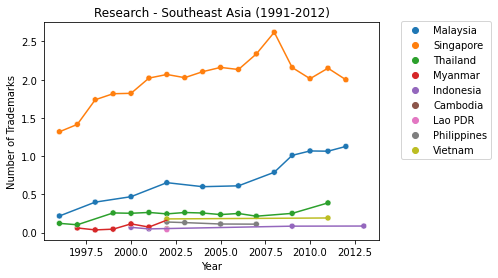

In [395]:
# Plot the responses for different events and regions
sea_research_pic = sns.lineplot(x="Year", y="Value",
                hue="CountryName", legend=False,
                data=sea_research)

sea_research_dot_pic = sns.scatterplot(x="Year", y="Value",
                hue="CountryName", legend=True,
                data=sea_research)

plt.legend(bbox_to_anchor=(1.35, 0.35), loc='lower right')
sea_research_dot_pic.set(title="% Research - Southeast Asia (1991-2012)", ylabel="Number of Trademarks")

plt.show(sea_research_dot_pic)

5.) Finance

In [269]:
ph_finance = ph_indicators.query('IndicatorCode == "NY.GDP.MKTP.KD.ZG"')
ph_finance

sea_finance = sea_indicators.query('IndicatorCode == "NY.GDP.MKTP.KD.ZG"')
sea_finance

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36789,Indonesia,IDN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,6.104915
40015,Malaysia,MYS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,7.597994
41326,Myanmar,MMR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,0.471561
43516,Philippines,PHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,5.616579
44999,Singapore,SGP,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,8.137625
...,...,...,...,...,...,...
5615007,Philippines,PHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,6.132343
5622216,Singapore,SGP,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,2.918389
5631395,Thailand,THA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,0.865664
5631960,Timor-Leste,TMP,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,7.003578


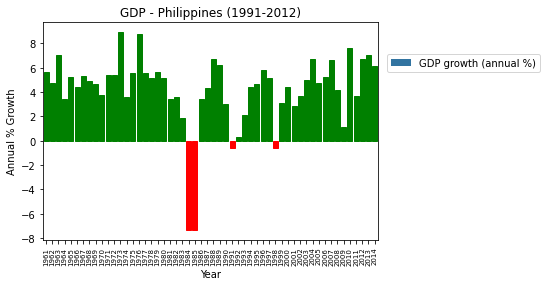

In [334]:
# Plot the responses for different events and regions
#clrs = ['red' if (x > 1) else 'green' for x in ph_finance["Value"]]

ph_finance_pic = sns.barplot(x="Year", y="Value",
                hue="IndicatorName",
                data=ph_finance)


plt.legend(bbox_to_anchor=(1.50, 0.75), loc='lower right')
ph_finance_pic.set(title="GDP - Philippines (1991-2012)", ylabel="Annual % Growth")
ph_finance_pic.set_xticklabels(ph_finance_pic.get_xticklabels(),rotation = 90, fontsize=7)
#plt.xticks(np.arange(0, len("Year")+50, 4))

for bar in ph_finance_pic.patches:
    if bar.get_height() > 0:
        bar.set_color('green')    
    else:
        bar.set_color('red')

plt.show(ph_finance_pic)